In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [8]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [9]:
print(list(df.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


**Can we predict whether a customer will churn based on their demographics, services, and billing information?**

In [10]:
#basic data understanding

df.shape

(7043, 21)

In [12]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
churns = df['Churn'].value_counts()

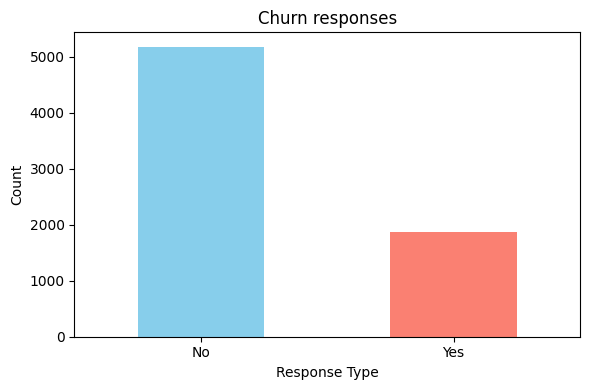

In [17]:
plt.figure(figsize=(6, 4))
churns.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Churn responses')
plt.xlabel('Response Type')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep x-axis labels horizontal

plt.tight_layout() # Adjust layout to not cut off labels

# Display the plot
plt.show()

In [16]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
df = df.dropna()

In [22]:
df_copy = df.copy() #making duplicate in case i am making a awful fucked up mess

In [ ]:
df.drop('customerID', axis=1, inplace=True) #customer id is not useful in prediction

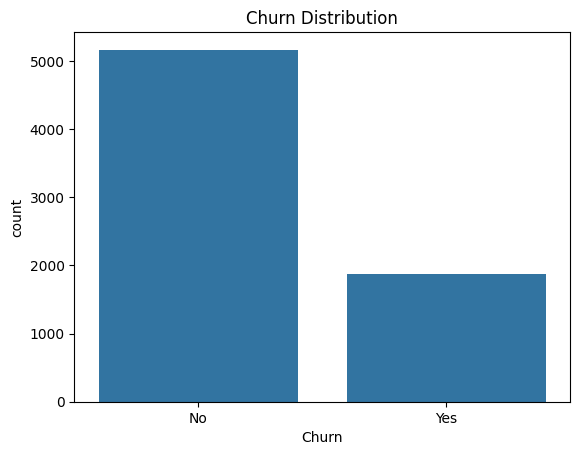

In [25]:
#churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

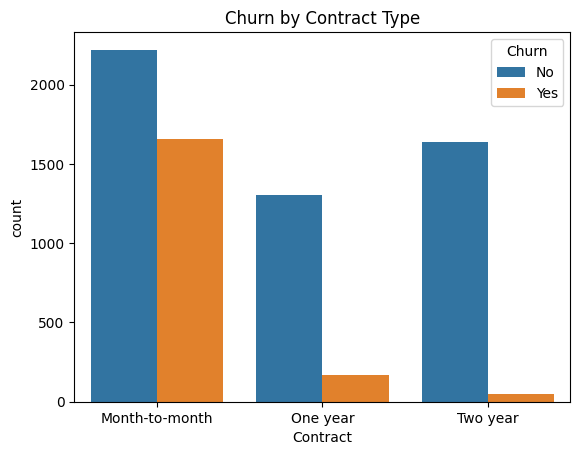

In [26]:
#Churn vs Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

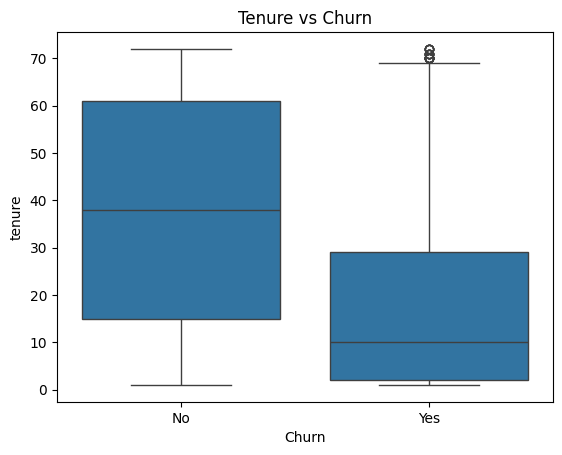

In [27]:
#Churn vs Tenure
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


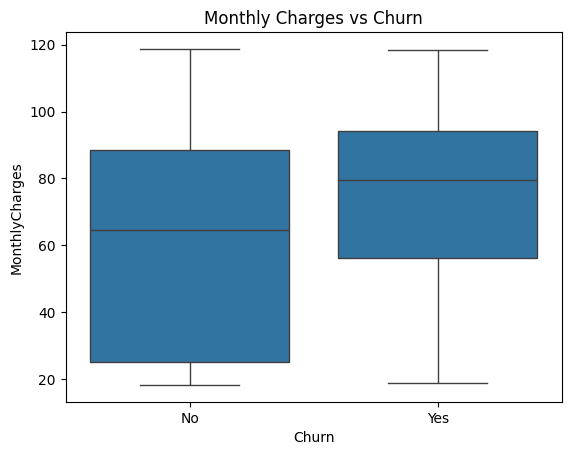

In [28]:
#Churn vs Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


encoding categorical values

In [29]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

/tmp/ipython-input-4069049957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [30]:
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling'
]

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


/tmp/ipython-input-4287303203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
/tmp/ipython-input-4287303203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
/tmp/ipython-input-4287303203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [31]:
df = pd.get_dummies(df, drop_first=True)

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [33]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
#logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [37]:
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC: 0.8356727976766699


In [38]:
#decision tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]


In [39]:
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC: 0.815478255017575


In [40]:
#random forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [41]:
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC: 0.837180529168457


In [42]:
#feature importance
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


In [43]:
feature_importance.head(10)


,0
tenure,0.204641
TotalCharges,0.149268
MonthlyCharges,0.089051
InternetService_Fiber optic,0.081263
Contract_Two year,0.073559
PaymentMethod_Electronic check,0.072734
OnlineSecurity_Yes,0.036064
Contract_One year,0.035593
TechSupport_Yes,0.026744
PaperlessBilling,0.019459


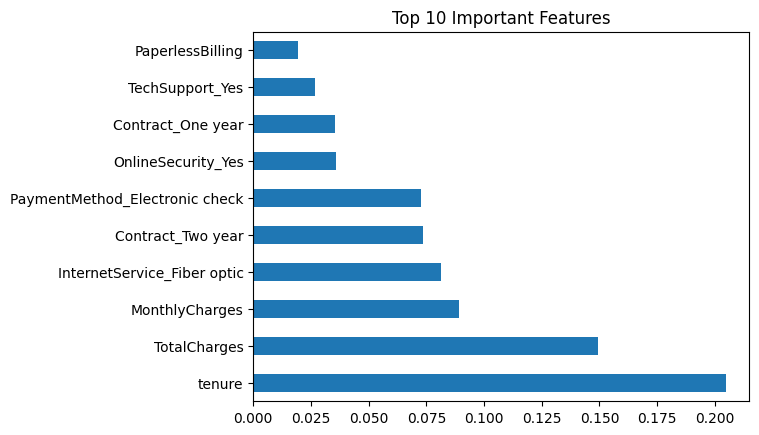

In [44]:
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [45]:
# Save feature names
feature_names = X.columns.tolist()

import joblib
joblib.dump(feature_names, "feature_names.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']

In [46]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.4 MB/s eta 0:00:00


In [47]:
import ipywidgets as widgets
from IPython.display import display
import joblib
import pandas as pd


In [48]:
model = joblib.load("rf_model.pkl")
scaler = joblib.load("scaler.pkl")
feature_names = joblib.load("feature_names.pkl")


In [49]:
gender = widgets.Dropdown(
    options=[('Female', 0), ('Male', 1)],
    description='Gender'
)

senior = widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    description='Senior'
)

partner = widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    description='Partner'
)

dependents = widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    description='Dependents'
)

contract = widgets.Dropdown(
    options=['Month-to-month', 'One year', 'Two year'],
    description='Contract'
)

internet = widgets.Dropdown(
    options=['DSL', 'Fiber optic', 'No'],
    description='Internet'
)


In [50]:
tenure = widgets.IntSlider(
    min=0, max=72, step=1, description='Tenure'
)

monthly = widgets.FloatSlider(
    min=20, max=120, step=1, description='Monthly$'
)

total = widgets.FloatSlider(
    min=0, max=9000, step=50, description='Total$'
)


In [51]:
def churn_predict_button(_):
    input_data = {
        'gender': gender.value,
        'SeniorCitizen': senior.value,
        'Partner': partner.value,
        'Dependents': dependents.value,
        'tenure': tenure.value,
        'MonthlyCharges': monthly.value,
        'TotalCharges': total.value,
        'PhoneService': 1,
        'PaperlessBilling': 1
    }

    # One-hot encoded fields
    input_data['Contract_One year'] = 1 if contract.value == 'One year' else 0
    input_data['Contract_Two year'] = 1 if contract.value == 'Two year' else 0
    input_data['InternetService_Fiber optic'] = 1 if internet.value == 'Fiber optic' else 0

    df_input = pd.DataFrame([input_data])
    df_input = df_input.reindex(columns=feature_names, fill_value=0)
    df_scaled = scaler.transform(df_input)

    prob = model.predict_proba(df_scaled)[0][1]

    print(f"🔮 Churn Probability: {prob:.2%}")
    print("❌ Will Churn" if prob > 0.5 else "✅ Will Stay")


In [52]:
button = widgets.Button(description="Predict Churn")
button.on_click(churn_predict_button)


In [55]:
display(
    gender, senior, partner, dependents,
    contract, internet,
    tenure, monthly, total,
    button
)


Dropdown(description='Gender', options=(('Female', 0), ('Male', 1)), value=0)

Dropdown(description='Senior', index=1, options=(('No', 0), ('Yes', 1)), value=1)

Dropdown(description='Partner', index=1, options=(('No', 0), ('Yes', 1)), value=1)

Dropdown(description='Dependents', index=1, options=(('No', 0), ('Yes', 1)), value=1)

Dropdown(description='Contract', options=('Month-to-month', 'One year', 'Two year'), value='Month-to-month')

Dropdown(description='Internet', index=1, options=('DSL', 'Fiber optic', 'No'), value='Fiber optic')

IntSlider(value=3, description='Tenure', max=72)

FloatSlider(value=38.0, description='Monthly$', max=120.0, min=20.0, step=1.0)

FloatSlider(value=1900.0, description='Total$', max=9000.0, step=50.0)

Button(description='Predict Churn', style=ButtonStyle())

🔮 Churn Probability: 69.53%
❌ Will Churn


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


🔮 Churn Probability: 69.53%
❌ Will Churn


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


🔮 Churn Probability: 65.87%
❌ Will Churn


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
